In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# title.ratings.tsv: Average rating of the film
**Very simple feature, and I think very powerful. We may also use some** `log(numVotes)` **to estimate how popular is the film**

In [2]:
ratings = pd.read_csv('data/imdb/title.ratings.tsv', sep='\t')
ratings.sample(8)

,tconst,averageRating,numVotes
1157339,tt7711308,9.2,22
971064,tt4294586,7.5,944
414054,tt0863087,5.8,69
247958,tt0459539,7.4,7
71088,tt0097449,3.3,73
641887,tt14011802,7.6,11
1042879,tt5522628,6.9,149
229121,tt0414756,7.7,101


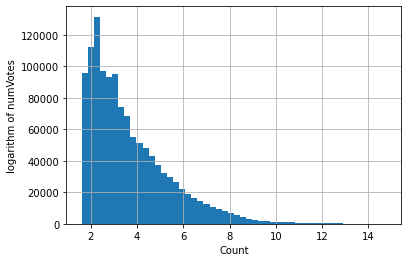

In [3]:
ratings.numVotes.apply(np.log).hist(bins=50)
plt.xlabel("Count")
plt.ylabel("logarithm of numVotes")
plt.show()

# title.basics.tsv: The main dataset with movies and series, their genres and other meta info

In [4]:
title = pd.read_csv('data/imdb/title.basics.tsv', sep='\t')
title.sample(8)

/opt/homebrew/Caskroom/miniforge/base/envs/core_ds/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
6250393,tt4101970,tvEpisode,Episode #3.33,Episode #3.33,0,2008,\N,\N,"Comedy,Romance"
8848970,tt9848904,tvEpisode,Fernando Vargas Knock Out Tank,Fernando Vargas Knock Out Tank,0,2018,\N,44,Reality-TV
2677071,tt13099400,video,An Unconventional Quarantine Documentary,An Unconventional Quarantine Documentary,0,2020,\N,28,"Comedy,Short"
1429217,tt10827608,tvEpisode,Water wizard,Water wizard,0,2018,\N,\N,"Adventure,Animation"
7044998,tt5897436,short,It's About Time,It's About Time,0,2015,\N,6,"Animation,Drama,Mystery"
7167394,tt6172312,tvEpisode,Episode #1.3,Episode #1.3,0,1983,\N,\N,\N
1726434,tt11359636,tvEpisode,Episode #1.44,Episode #1.44,0,2006,\N,\N,"Comedy,Drama,Romance"
8008495,tt8026016,tvEpisode,Episode #1.78,Episode #1.78,0,2010,\N,\N,Drama


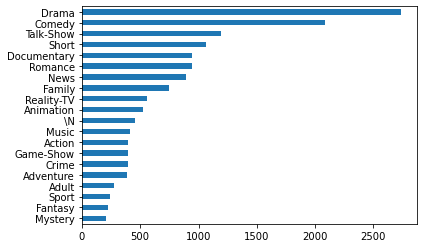

In [5]:
from itertools import chain
genres_distribution = list(
    chain(
        *title.sample(10000).genres.apply(lambda x: x.split(","))
    )
)
genres_distribution = pd.Series(genres_distribution)
genres_distribution.value_counts()[:20][::-1].plot.barh()
plt.show()

**There are quite a lot different genres, I don't think it's reasonable to account them all. Though, if we take top-20 of them and one-hot encode — that may work.** (c) Maxim

# name.basics.tsv: People in this sphere, their famous titles

In [6]:
people = pd.read_csv('data/imdb/name.basics.tsv', sep='\t')
people.sample(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
267075,nm0281714,Juliette Fleming,\N,\N,actress,"tt0164247,tt0096189,tt0272400,tt0143078"
5629452,nm2787672,Cam Janzen,\N,\N,actor,tt0286922
3849717,nm13064290,Arthur Holden,\N,\N,actor,tt9341104
9069835,nm6847572,Jerrome Buck-Townsend,\N,\N,"sound_department,composer","tt6491130,tt4123680,tt6156318"
2881316,nm12047138,Jvar Diaz,\N,\N,NaN,\N


In [7]:
people.replace("\\N", np.nan).info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11586846 entries, 0 to 11586845
Data columns (total 6 columns):
 #   Column             Non-Null Count     Dtype 
---  ------             --------------     ----- 
 0   nconst             11586846 non-null  object
 1   primaryName        11586846 non-null  object
 2   birthYear          549400 non-null    object
 3   deathYear          200878 non-null    object
 4   primaryProfession  9113661 non-null   object
 5   knownForTitles     9541957 non-null   object
dtypes: object(6)
memory usage: 530.4+ MB


Further we work with a sample from dataset, otherwise it's too long

In [8]:
people_sample = people.sample(frac=0.01)

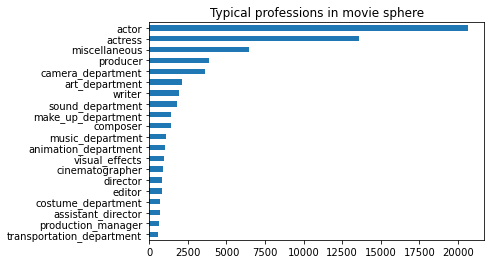

In [9]:
people_sample.primaryProfession.value_counts()[:20][::-1].plot.barh(title='Typical professions in movie sphere')
plt.show()

# title.crew.tsv: Who are the directors and writers of the movie/show

In [10]:
crew = pd.read_csv('data/imdb/title.crew.tsv', sep='\t')
crew.replace("\\N", np.nan, inplace=True)
crew.sample(8)

,tconst,directors,writers
3954824,tt15436408,NaN,NaN
3766935,tt15092528,nm1760829,"nm12728170,nm12728169"
4235150,tt15953422,NaN,NaN
1216321,tt10446376,NaN,NaN
6676707,tt5059778,nm2638099,NaN
8226124,tt8492576,"nm0170235,nm0955161,nm0432754","nm1225622,nm0612901"
140920,tt0145263,nm0921931,NaN
6421652,tt4482004,"nm13097335,nm13097338,nm13097336,nm3143261,nm1...",nm11138746


In [11]:
crew.replace("\\N", np.nan).info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8882383 entries, 0 to 8882382
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   tconst     8882383 non-null  object
 1   directors  5075473 non-null  object
 2   writers    4548108 non-null  object
dtypes: object(3)
memory usage: 203.3+ MB


Some of the most productive directors produced 10k episodes of smth

In [12]:
overly_productive_directors = crew.directors.value_counts()[:7]
overly_productive_directors

nm1203430     10955
nm1409127     10398
nm13220986     8024
nm0022750      6307
nm0565214      5967
nm2544856      5490
nm0600353      5015
Name: directors, dtype: int64

Here are their names

In [13]:
overly_productive_directors_ids = overly_productive_directors.index.tolist()
people.query("nconst in @overly_productive_directors_ids")

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
21899,nm0022750,Paul Alter,1922,2011,"director,producer,writer","tt0071063,tt0068120,tt0264464,tt0073991"
533900,nm0565214,Kevin McCarthy,\N,\N,"director,assistant_director","tt0159881,tt0192900,tt4919634,tt4067972"
566823,nm0600353,Gloria Monty,1921,2006,"director,producer","tt0056758,tt0046641,tt0202206,tt0063879"
2869072,nm1203430,Johnny Manahan,\N,\N,"director,writer,actor","tt0363402,tt0380738,tt0467235,tt0344018"
3999066,nm13220986,Conrado Lumabas,\N,\N,director,tt0484535
4411576,nm1409127,Bert De Leon,1947,2021,"director,miscellaneous,writer","tt1627578,tt0422876,tt0344642,tt2144742"
5418988,nm2544856,Bruno De Paola,\N,\N,director,"tt0117367,tt0204094,tt18565402,tt6448932"


**In sum, straightforward extraction of the directors (with one-hot encoding or smth) is a bad idea. May be Danis can suggest some approach that can do two matrix factorizations simultaneously? Or any other approach that can handle that type of relation, which is very similar to classic user-item problem (i.e. RecSys problem). I'm sure there are some, though I'm not sure whether it's reasonable to use them** (c) Maxim

# title.principals.tsv: Many-to-many relation between actors/directors/etc and the movies/series/etc

In [14]:
principals = pd.read_csv('data/imdb/title.principals.tsv', sep='\t')
principals.sample(8)

,tconst,ordering,nconst,category,job,characters
4250874,tt0587301,9,nm0094064,actor,\N,"[""Tristram""]"
12749350,tt11589706,2,nm0470385,actor,\N,"[""Avdeev""]"
8938684,tt10451150,2,nm3910015,self,\N,"[""Self - Co-Host""]"
42446752,tt7164388,9,nm0001553,composer,\N,\N
31016649,tt2310587,7,nm0668635,self,\N,"[""Self - Reporter""]"
17357065,tt13136400,1,nm11895413,self,\N,"[""Self""]"
42617437,tt7233724,2,nm1111195,actress,\N,"[""Sandawa""]"
16690082,tt1292087,4,nm0260778,actor,\N,"[""Augusto Neves""]"


**The same problem as with title.crew.tsv (file above). If we come up with some factorization of this sparse relation matrix - that may work great**

# title.akas.tsv - I don't understand what's it, so may be we won't need it

In [15]:
title = pd.read_csv('data/imdb/title.akas.tsv', sep='\t')
title.sample(8)

/opt/homebrew/Caskroom/miniforge/base/envs/core_ds/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
23556702,tt4636564,7,एपिसोड #1.6534,IN,hi,\N,\N,0
14189367,tt15046550,1,What's Mine Is Yours,\N,\N,original,\N,1
16278359,tt1628909,1,Episodio fechado 29 marzo 2010,ES,es,\N,\N,0
29356382,tt8585800,6,Control,\N,\N,original,\N,1
29644936,tt8762090,6,Épisode #1.25,FR,fr,\N,\N,0
15721633,tt15828994,7,Folge #1.323,DE,de,\N,\N,0
2456036,tt0677797,1,Neighboring Species,US,\N,\N,\N,0
21294098,tt2979840,3,Épisode #3.12,FR,fr,\N,\N,0


# title.episode.tsv: The relation between the episode of show/series, and the show/series themselves.
**I'm pretty sure we won't need it** (c) Maxim

In [16]:
episodes = pd.read_csv('data/imdb/title.episode.tsv', sep='\t')
episodes.sample(8)

,tconst,parentTconst,seasonNumber,episodeNumber
1541343,tt12397916,tt12393942,5,15
4659490,tt4215368,tt1560523,1,168
4355026,tt3207752,tt1196636,\N,\N
88852,tt0578815,tt0244509,1,5
283157,tt0783222,tt0430858,3,9
1665547,tt12686894,tt12404172,1,200
4891863,tt4931672,tt0346255,19,693
1973974,tt13380704,tt13253496,\N,\N
